<a href="https://colab.research.google.com/github/Gabriel-Leite-Py/DIO_Exercices/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de dimensionalidade de uma imagem
Author: Gabriel de Arruda Leite

Contact: gabriell.arruda20@hotmail.com

About this project:
# Dimensionality Reduction of an Image

For this project, basic techniques are employed to reduce the dimensionality of an image, aiming to obtain simpler and lighter data for large-scale processing.

The composition of a color image is given by three matrices, i.e., three dimensions. Each dimension represents the intensity value of the corresponding matrix, in this case, RGB (Red, Green, and Blue). Thus, with a three-dimensional image representing the intensity of each of these colors, the original image is formed.

To achieve dimensionality reduction, which in practice brings various benefits such as reduced processing and file size, we can work with grayscale images. To do this, simply take the average of the three dimensions pixel by pixel, where the new value is the representation in shades of gray for that pixel.

Furthermore, to further reduce an image, it is possible to perform binarization, a process that instead of having 255 levels of gray, makes the image completely binary, hence the name. In practice, the image then only has values of 0 (Black) and 255 (White), aiding in segmentation processes and even noise removal with morphological operations such as opening, closing, and their derivatives.


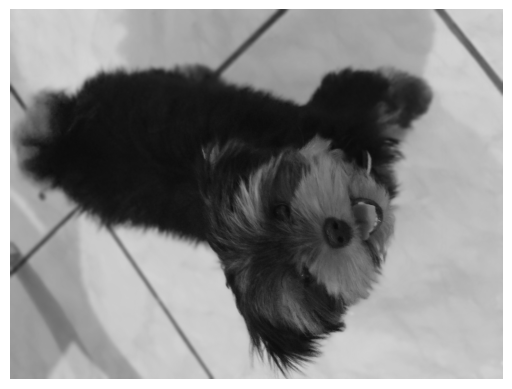

In [31]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image in Colab
image_path = '/content/imagem.jpg'

def convert_to_grayscale(image):
    # Get image dimensions
    width, height = image.size

    # Load image pixels
    pixels = image.load()

    # Iterate through each pixel
    for i in range(width):
        for j in range(height):
            # Get RGB values of the pixel
            r, g, b = pixels[i, j]

            # Calculate the average of RGB values
            grayscale_value = int((r + g + b) / 3)

            # Set the pixel to grayscale
            pixels[i, j] = (grayscale_value, grayscale_value, grayscale_value)

    return image

# Read the image using PIL
image = Image.open(image_path)

# Convert to grayscale
grayscale_image = convert_to_grayscale(image.copy())

# Display the image
plt.imshow(grayscale_image)
plt.axis('off')
plt.show()

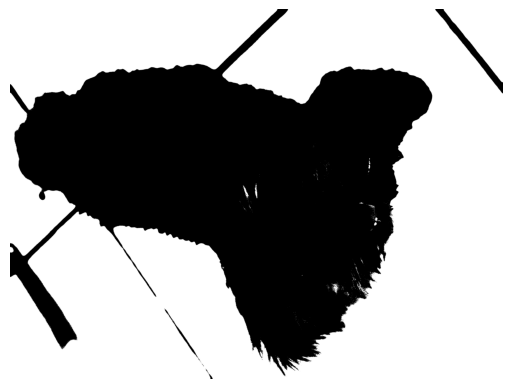

In [32]:
def binarize_image(image):
    width, height = image.size
    pixels = image.load()

    for i in range(width):
        for j in range(height):
            # Calculate grayscale intensity
            gray_intensity = pixels[i, j][0]

            # Binarize based on the threshold (126)
            if gray_intensity > 126:
                pixel_value = 255  # White
            else:
                pixel_value = 0    # Black

            # Set the pixel in the binarized image
            pixels[i, j] = (pixel_value, pixel_value, pixel_value)

    return image

# Binarize the grayscale image
binarized_image = binarize_image(grayscale_image.copy())

# Display the binarized image
plt.imshow(binarized_image)
plt.axis('off')
plt.show()

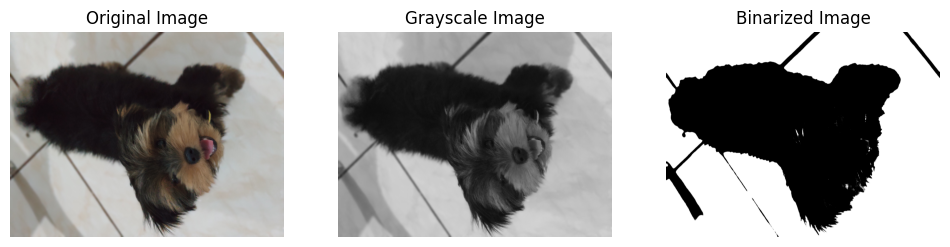

In [33]:
# Plotting the original, grayscale, and binarized images together
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_image)
plt.title('Grayscale Image')
plt.axis('off')

# Binarized Image
plt.subplot(1, 3, 3)
plt.imshow(binarized_image)
plt.title('Binarized Image')
plt.axis('off')

plt.show()